In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d muhammadikhwankhalid/rice-leaf-disease-dataset

100% 195M/196M [00:03<00:00, 68.7MB/s]
100% 196M/196M [00:03<00:00, 55.1MB/s]


In [ ]:
!unzip rice-leaf-disease-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Rice Leaf Disease Images/Bacterialblight/BACTERIALBLIGHT1_141.JPG  
  inflating: Rice Leaf Disease Images/Bacterialblight/BACTERIALBLIGHT1_142.JPG  
  inflating: Rice Leaf Disease Images/Bacterialblight/BACTERIALBLIGHT1_143.JPG  
  inflating: Rice Leaf Disease Images/Bacterialblight/BACTERIALBLIGHT1_144.JPG  
  inflating: Rice Leaf Disease Images/Bacterialblight/BACTERIALBLIGHT1_145.JPG  
  inflating: Rice Leaf Disease Images/Bacterialblight/BACTERIALBLIGHT1_146.JPG  
  inflating: Rice Leaf Disease Images/Bacterialblight/BACTERIALBLIGHT1_147.jpg  
  inflating: Rice Leaf Disease Images/Bacterialblight/BACTERIALBLIGHT1_148.jpg  
  inflating: Rice Leaf Disease Images/Bacterialblight/BACTERIALBLIGHT1_149.jpg  
  inflating: Rice Leaf Disease Images/Bacterialblight/BACTERIALBLIGHT1_150.jpg  
  inflating: Rice Leaf Disease Images/Bacterialblight/BACTERIALBLIGHT1_151.jpg  
  inflating: Rice Leaf Disease Images/Bacterialblight/BACT

In [ ]:
!pip install split-folders

In [ ]:
!splitfolders --ratio .8 .1 .1 -- '/content/Rice Leaf Disease Images'

Copying files: 5932 files [00:00, 6421.98 files/s]


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [ ]:
TRAIN_DIR = "/content/output/train"
VAL_DIR = "/content/output/val"
TEST_DIR = "/content/output/test"
CHANNELS = 3
TARGET_SIZE = (150,150)
BATCH_SIZE = 32
EPOCHS = 10

In [ ]:
train_ds = train_datagen.flow_from_directory(TRAIN_DIR, target_size = TARGET_SIZE, class_mode = 'categorical', batch_size = BATCH_SIZE)

val_ds = train_datagen.flow_from_directory(VAL_DIR, target_size = TARGET_SIZE, class_mode = 'categorical', batch_size = BATCH_SIZE)

test_ds = train_datagen.flow_from_directory(TEST_DIR, target_size = TARGET_SIZE, class_mode = 'categorical', batch_size = BATCH_SIZE)

Found 4745 images belonging to 4 classes.
Found 592 images belonging to 4 classes.
Found 595 images belonging to 4 classes.


In [ ]:
train_ds.class_indices

{'Bacterialblight': 0, 'Blast': 1, 'Brownspot': 2, 'Tungro': 3}

In [ ]:
labels = {0 : 'Bacterialblight', 1 :'Blast', 2 : 'Brownspot' , 3 : 'Tungro'}

In [ ]:
class_names = list(train_ds.class_indices)
class_names

['Bacterialblight', 'Blast', 'Brownspot', 'Tungro']

In [ ]:
n_class_names = len(class_names)
n_class_names

4

In [ ]:
for image_batch, label_batch in train_ds :
  print(image_batch[0])
  print(label_batch[0])
  print(image_batch[0].shape)
  break

[[[0.08235294 0.21960786 0.32941177]
  [0.08235294 0.21960786 0.32941177]
  [0.08235294 0.21960786 0.32941177]
  ...
  [0.05882353 0.10980393 0.08235294]
  [0.0627451  0.10980393 0.09411766]
  [0.06666667 0.1137255  0.09803922]]

 [[0.09411766 0.23137257 0.34117648]
  [0.09411766 0.23137257 0.34117648]
  [0.09411766 0.23137257 0.34117648]
  ...
  [0.0627451  0.10980393 0.09411766]
  [0.07450981 0.12156864 0.10588236]
  [0.09019608 0.13725491 0.12156864]]

 [[0.09803922 0.23529413 0.34509805]
  [0.09803922 0.23529413 0.34509805]
  [0.09803922 0.23529413 0.34509805]
  ...
  [0.05882353 0.10588236 0.09019608]
  [0.07058824 0.11764707 0.10196079]
  [0.09803922 0.14117648 0.1254902 ]]

 ...

 [[0.05490196 0.09019608 0.07843138]
  [0.06666667 0.10196079 0.09019608]
  [0.0627451  0.09803922 0.08627451]
  ...
  [0.04705883 0.09411766 0.08627451]
  [0.05882353 0.10588236 0.10588236]
  [0.0509804  0.09803922 0.09803922]]

 [[0.0627451  0.09803922 0.08627451]
  [0.0627451  0.09803922 0.08627451]


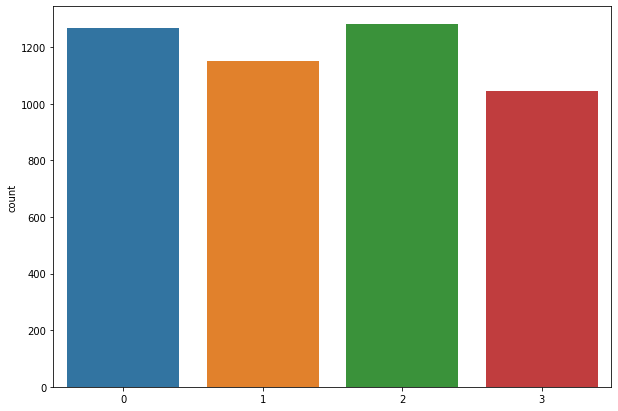

In [ ]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.countplot(x = train_ds.classes)

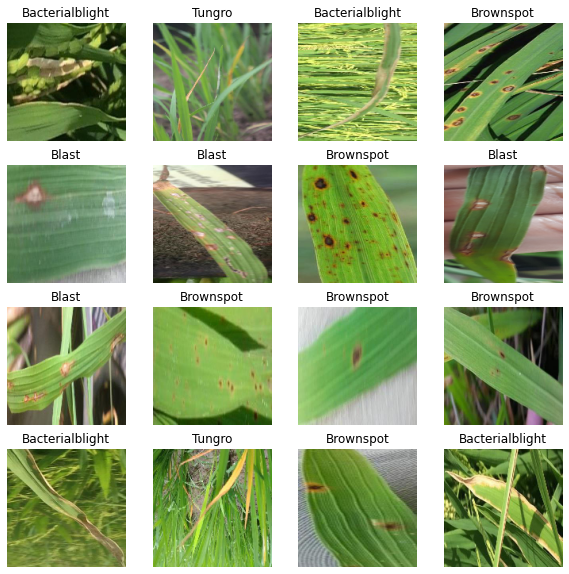

In [ ]:
x,y = next(train_ds)

# function to plot images
def plotImages(x,y):
    plt.figure(figsize=(10,10))
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.imshow(x[i])
        plt.title(class_names[np.argmax(y[i])])
        plt.axis("off")
    plt.show()

plotImages(x,y)

In [ ]:
!pip install --upgrade tensorflow_hub

In [ ]:
import tensorflow_hub as hub
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
pretrained_model = "https://tfhub.dev/google/imagenet/resnet_v1_50/feature_vector/5"

base_model = hub.KerasLayer(
    pretrained_model,
    input_shape = (150,150,3),
    trainable = False
)

In [ ]:
METRICS = [
           tf.keras.metrics.CategoricalAccuracy(name = 'accuracy'),
           tf.keras.metrics.Recall(name = 'recall'),
           tf.keras.metrics.Precision(name = 'precision')
]

In [ ]:
model = tf.keras.Sequential([
                             base_model,
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(n_class_names, activation = 'softmax')
])

model.summary()

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits = False),
    metrics = METRICS
)

callbacks = [
             EarlyStopping(monitor = 'accuracy', patience = 3),
             ModelCheckpoint("model.h5", verbose = 1, save_best_only = True)
             ]

history = model.fit(train_ds, 
          epochs = EPOCHS, 
          batch_size = BATCH_SIZE, 
          validation_data = val_ds, 
          verbose = 1, 
          callbacks = callbacks)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_6 (KerasLayer)  (None, 2048)              23561152  
                                                                 
 flatten_9 (Flatten)         (None, 2048)              0         
                                                                 
 dense_9 (Dense)             (None, 4)                 8196      
                                                                 
Total params: 23,569,348
Trainable params: 8,196
Non-trainable params: 23,561,152
_________________________________________________________________
Epoch 1/10
149/149 [==============================] - ETA: 0s - loss: 0.3526 - accuracy: 0.8911 - recall: 0.8679 - precision: 0.9131
Epoch 1: val_loss improved from inf to 0.15204, saving model to model.h5
149/149 [==============================] - 17s 105ms/step - loss: 0.3526 - accuracy: 0.8911 - re

In [ ]:
test_scores = model.evaluate(test_ds)

19/19 [==============================] - 2s 116ms/step - loss: 0.0276 - accuracy: 0.9950 - recall: 0.9950 - precision: 0.9950


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'recall', 'precision', 'val_loss', 'val_accuracy', 'val_recall', 'val_precision'])

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

recall = history.history['recall']
val_recall = history.history['val_recall']

precision = history.history['precision']
val_precision = history.history['val_precision']

Text(0.5, 1.0, 'Training and Validation Accuracy')

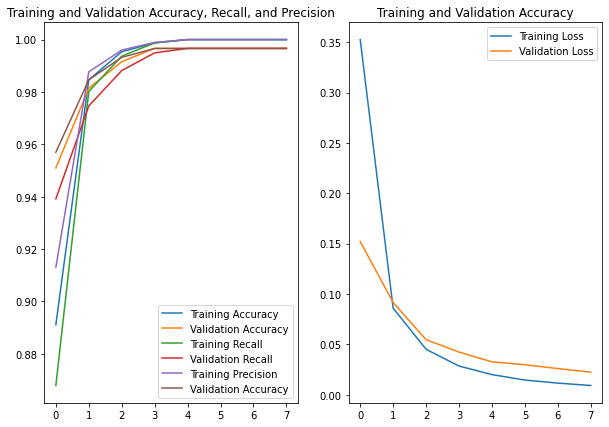

In [ ]:
plt.figure(figsize=(10,7))
plt.subplot(1, 2, 1)
plt.plot(range(8), acc, label = 'Training Accuracy')
plt.plot(range(8), val_acc, label = 'Validation Accuracy')
plt.plot(range(8), recall, label = 'Training Recall')
plt.plot(range(8), val_recall, label = 'Validation Recall')
plt.plot(range(8), precision, label = 'Training Precision')
plt.plot(range(8), val_precision, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy, Recall, and Precision')

plt.subplot(1, 2, 2)
plt.plot(range(8), loss, label = 'Training Loss')
plt.plot(range(8), val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Accuracy')

In [ ]:
import tensorflow as tf
from pathlib import Path
from tensorflow.keras.models import load_model

# load the best saved model from our last training
myModel = tf.keras.models.load_model("model.h5",custom_objects={'KerasLayer':hub.KerasLayer})

# create a TFLiteConverter object from a TensorFlow Keras model 
converter = tf.lite.TFLiteConverter.from_keras_model(myModel)

# converts a Keras model based on instance variable
myModel_tflite = converter.convert()

# Save the model
tflite_model_file = Path('padiq_classifier.tflite')
tflite_model_file.write_bytes(myModel_tflite)

INFO:tensorflow:Assets written to: /tmp/tmpni2exywq/assets


INFO:tensorflow:Assets written to: /tmp/tmpni2exywq/assets


94028480

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img
import tensorflow.lite as tflite
# in AWS Lambda, we need to use this import below
# import tflite_runtime.interpreter as tflite

# Create an interpreter interface for any model in TFLite
interpreter = tflite.Interpreter(model_path='padiq_classifier.tflite')
interpreter.allocate_tensors()

# Get a list of input details from the model
input_details = interpreter.get_input_details()
input_index = input_details[0]['index']

# Get a list of output details from the model
output_details = interpreter.get_output_details()
output_index = output_details[0]['index']

labels = ['Bacterialblight', 'Blast', 'Brownspot', 'Tungro']

# Obtain the image location
img_loc = '/content/output/test/Blast/BLAST1_026.jpg'

# load the image using load_img module
img = load_img(path=img_loc, target_size=(150,150))

# Turn the image into a 4D-array
X = np.expand_dims(img, axis=0)

# Normalize the image
X = X/255.0

# Turn the image into a Numpy array with float32 data type
X = X.astype('float32')


In [ ]:
# set the value of the input tensor
interpreter.set_tensor(input_index, X)
interpreter.invoke()

# Get the value of the output tensor
preds = interpreter.get_tensor(output_index)
dict(zip(labels, preds[0]))

{'Bacterialblight': 2.1097928e-06,
 'Blast': 0.99990976,
 'Brownspot': 8.814878e-05,
 'Tungro': 1.5684861e-11}